In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

#import os
#import json
#s = json.load( open(os.getenv('PUI2016') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [2]:
puidata = os.getenv("PUIDATA")

In [ ]:
! curl -O https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip
! mv 201502-citibike-tripdata.zip $PUIDATA
! unzip $PUIDATA/201502-citibike-tripdata.zip 
! mv 201502-citibike-tripdata.csv $PUIDATA

In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + '/201502-citibike-tripdata.csv')
df.head()
df['date'] = pd.to_datetime(df['starttime'])
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [4]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [5]:
df.head()

,gender,date
0,2,2015-02-01 00:00:00
1,1,2015-02-01 00:00:00
2,2,2015-02-01 00:01:00
3,2,2015-02-01 00:01:00
4,1,2015-02-01 00:01:00


Text(0.5,1,'Citibike bikers by gender by February 2015')

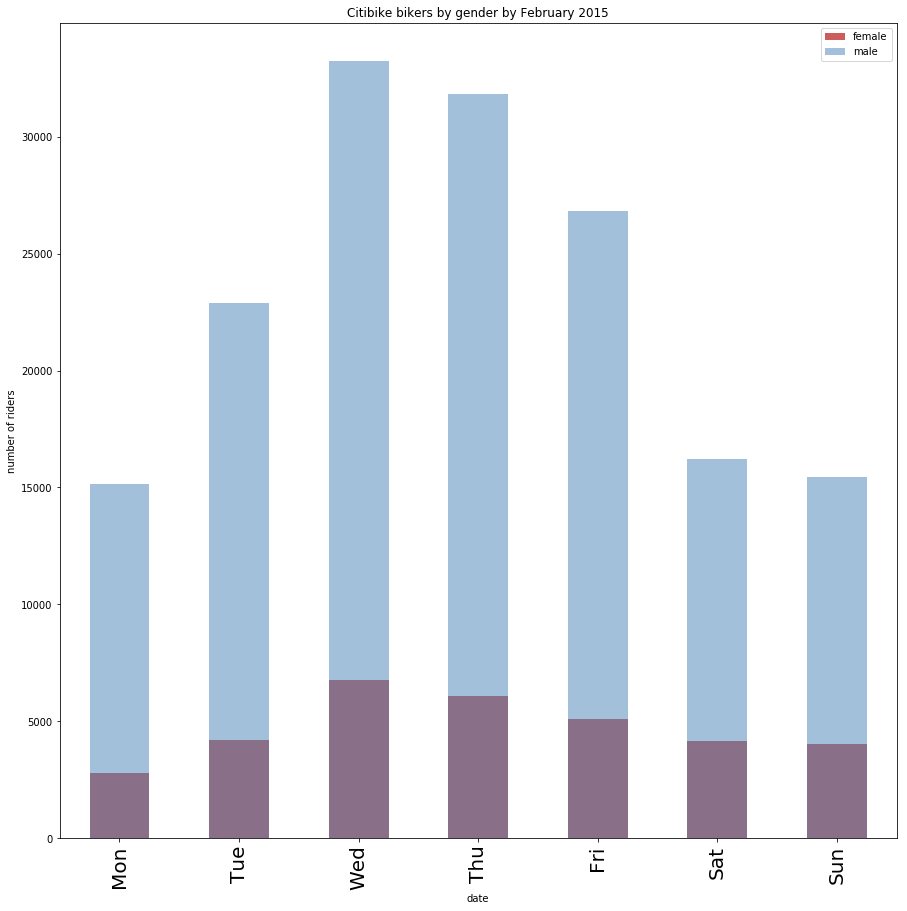

In [7]:
#gender ==2 female. gender ==1 male
fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['date'][df['gender'] == 2].groupby([df['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='female')

norm_m = 1
ax = ((df['date'][df['gender'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()

pl.ylabel("number of riders")
pl.title("Citibike bikers by gender by February 2015")

## Figure1:Distribution of Citibike bikers by gender by February 2015 we can see that more men use bike than women do